In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

eventos = pd.read_csv('../Data/events.csv',low_memory=False)

In [2]:
eventos.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [3]:
eventos['timestamp'] = pd.to_datetime(eventos['timestamp'])

In [4]:
eventos['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [5]:
telefonosComprados = eventos.loc[(eventos['event'] == 'conversion'),:]
telefonosComprados = telefonosComprados.loc[:,['timestamp','person','model','condition','storage','color']]
telefonosComprados.head(5)

,timestamp,person,model,condition,storage,color
220,2018-03-20 17:46:12,00204059,Motorola Moto X2,Muito Bom,32GB,Couro Vintage
2282,2018-04-26 22:28:53,00c13dee,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco
2547,2018-06-10 14:37:50,00fdbb4b,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco
4245,2018-03-16 13:50:25,0146a9df,iPhone 5s,Bom,32GB,Cinza espacial
6985,2018-02-09 22:07:07,01db2fe6,Samsung Galaxy J5,Bom,16GB,Preto


## Análisis sobre los usuarios que más compras realizaron 

In [6]:
telefonosComprados['person'].value_counts().head(10)

252adec6    15
4200bdee    12
a0d4baef    11
ba325a6b    10
f646efa2     8
d12fbe38     8
a96e304b     8
baa40260     7
a7713c81     7
19b38ba2     7
Name: person, dtype: int64

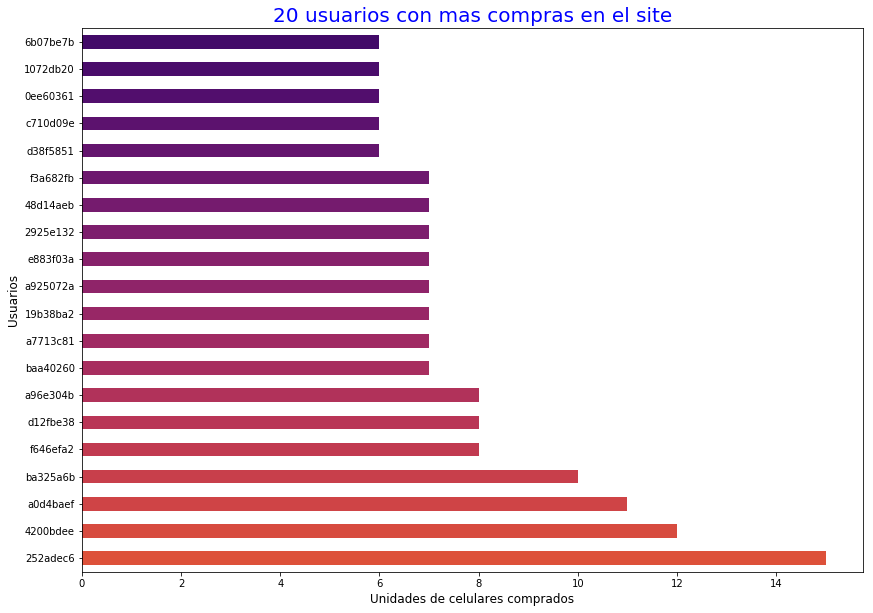

In [7]:
color = cm.inferno_r(np.linspace(.4,.8, 20))
plot = telefonosComprados['person'].value_counts().head(20).plot(kind='barh',figsize=(14,10),color = color)
plot.set_xlabel('Unidades de celulares comprados',fontsize=12)
plot.set_ylabel('Usuarios',fontsize=12)
plot.set_title('20 usuarios con mas compras en el site', fontsize=20,color = 'blue')
plt.show()

Claramente se ve que hay un usuario que registra el top compras de celulares,  intuimos que se debe ser algún tipo de comerciante por la cantidad de demanda que hace al site.

## Análisis sobre algunas caracteristicas de los celulares vendidos

### Estado de los celulares vendidos

In [8]:
telefonosComprados['condition'].value_counts()

Bom                   538
Muito Bom             352
Excelente             258
Bom - Sem Touch ID     22
Novo                    2
Name: condition, dtype: int64

Se debe arreglar el tema de los estados 'Bom - Sem Touch ID' por 'Bom'

In [9]:
def applyFunc(s):
    if s == 'Bom - Sem Touch ID':
        return 'Bom'
    else:
        return s


In [10]:
telefonosComprados['condition'] = telefonosComprados['condition'].map( applyFunc )

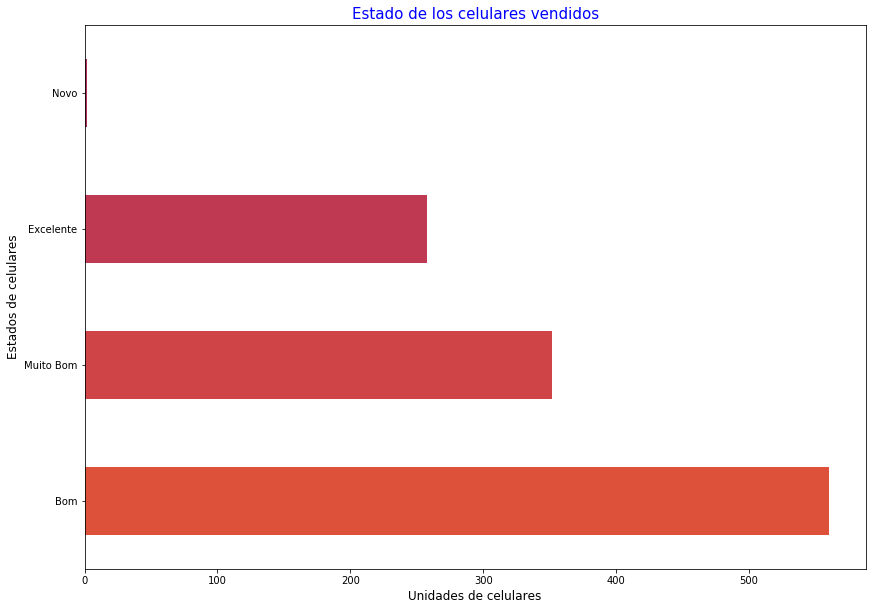

In [11]:
color = cm.inferno_r(np.linspace(.4,.8, 10))
plot = telefonosComprados['condition'].value_counts().plot(kind='barh',figsize=(14,10),color = color)
plot.set_ylabel('Estados de celulares',fontsize=12)
plot.set_xlabel('Unidades de celulares',fontsize=12)
plot.set_title('Estado de los celulares vendidos', fontsize=15,color = 'blue')
plt.show()

En este caso se nota que la mayoría de los celulares se encuentran en buen estado, y por lo visto, en el site hay muy pocos celulares nuevos comparado con los demás estados.

Una conclusión es que los usuarios que compran en el sitio no necesariamente buscan el estado optimo en un celular, se conforman con un celular en buen estado. 

### Capacidad de los celulares vendidos

In [12]:
telefonosComprados['storage'].value_counts()

16GB     552
32GB     265
8GB      205
64GB     102
128GB     27
4GB       17
512MB      3
256GB      1
Name: storage, dtype: int64

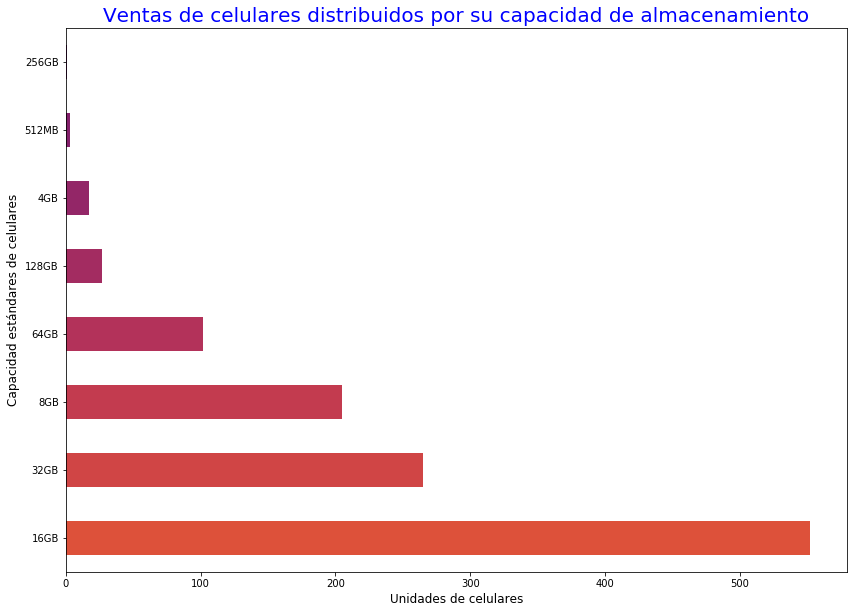

In [13]:
color = cm.inferno_r(np.linspace(.4,.8, 11))
plot = telefonosComprados['storage'].value_counts().plot(kind='barh',figsize=(14,10),color = color)
plot.set_ylabel('Capacidad estándares de celulares',fontsize=12)
plot.set_xlabel('Unidades de celulares',fontsize=12)
plot.set_title('Ventas de celulares distribuidos por su capacidad de almacenamiento', fontsize=20,color = 'blue')
plt.show()

En un primer vistazo se ve que la mayor parte de los celulares vendidos no contemplan el hecho de tener poca capacidad de almacenamiento, más bien intentan de obtener una capacidad dentro del rango de 16,31 y 8 GB.

### Colores de los celulares vendidos

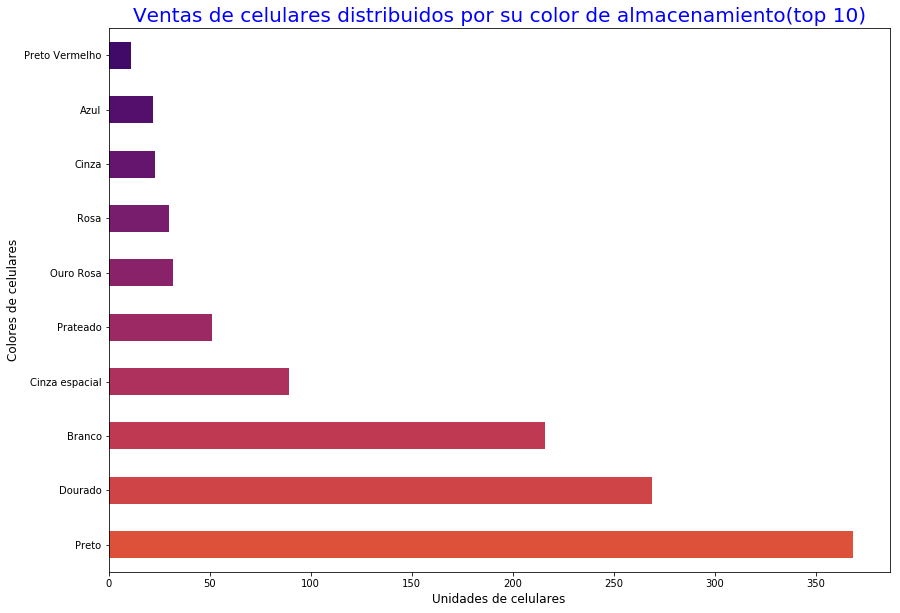

In [14]:
color = cm.inferno_r(np.linspace(.4,.8, 10))
plot = telefonosComprados['color'].value_counts().head(10).plot(kind='barh',figsize=(14,10),color = color)
plot.set_ylabel('Colores de celulares',fontsize=12)
plot.set_xlabel('Unidades de celulares',fontsize=12)
plot.set_title('Ventas de celulares distribuidos por su color de almacenamiento(top 10)', fontsize=20,color = 'blue')
plt.show()

Como era de esperarse, el color negro, blanco y dorado(sorprendentemente) dominan las elecciones por los compradores.

### Marcas de celulares vendidos

In [15]:
telefonosComprados['marca'] = telefonosComprados.apply( lambda x: str(x['model']).split()[0], axis = 1)

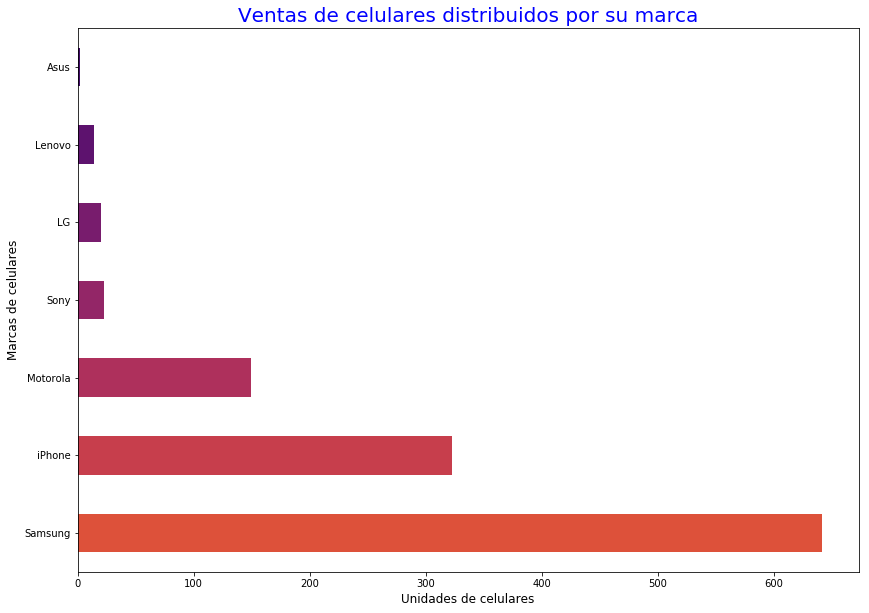

In [16]:
color = cm.inferno_r(np.linspace(.4,.8, 7))
plot = telefonosComprados['marca'].value_counts()[:].head(10).plot(kind='barh',figsize=(14,10),color = color)
plot.set_ylabel('Marcas de celulares',fontsize=12)
plot.set_xlabel('Unidades de celulares',fontsize=12)
plot.set_title('Ventas de celulares distribuidos por su marca', fontsize=20,color = 'blue')
plt.show()

Como lo indica el mercado, esta página no es la excepción, los dos gigantes de la industria de la telefonía como lo son Apple(iPad + iPhone) y Samsung son las marcas que tienen mayor ventas en el site.
Motorola se consolida como la mejor tercera opción excluyente a las compañias surcoreanas y las estadounidense.
Las demás empresas tienen una menor demanda.

### Modelos de celulares vendidos

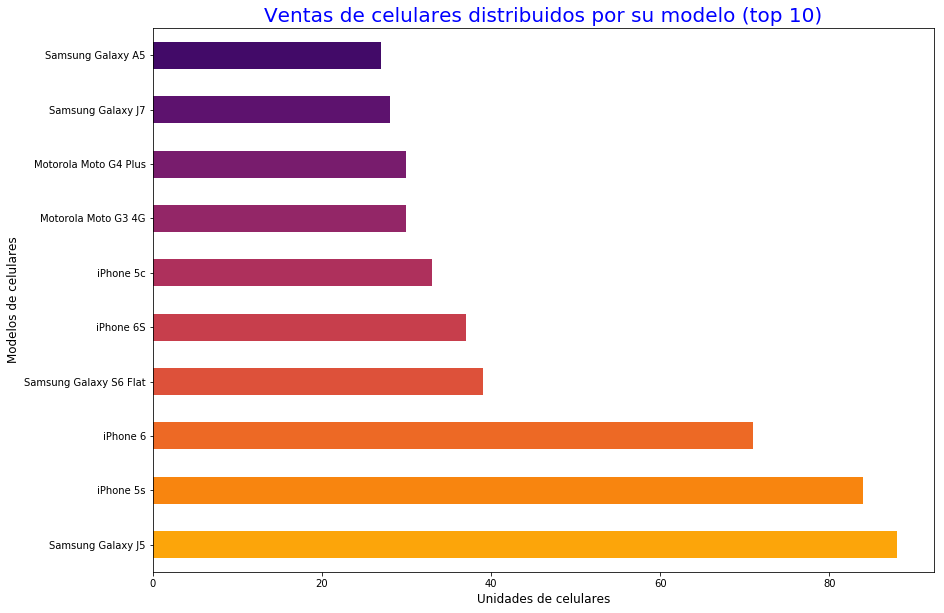

In [17]:
color = cm.inferno_r(np.linspace(.2,.8, 10))
plot = telefonosComprados['model'].value_counts()[:].head(10).plot(kind='barh',figsize=(14,10),color = color)
plot.set_ylabel('Modelos de celulares',fontsize=12)
plot.set_xlabel('Unidades de celulares',fontsize=12)
plot.set_title('Ventas de celulares distribuidos por su modelo (top 10)', fontsize=20,color = 'blue')
plt.show()

Siguiendo con lo anterior, los modelos de celulares vendidos son claramente dominados por Apple y Samsung a tal punto que dentro los 10 modelos más vendidos, no deja que ningún otro modelo de otra marca entre dicho top hasta recientemente la posicion 7 y 8 con presencia de dos modelos Motorola.

## Ventas de celulares dependiendo del año/mes/día de la semana

### Por mes en los primeros 6 meses del año

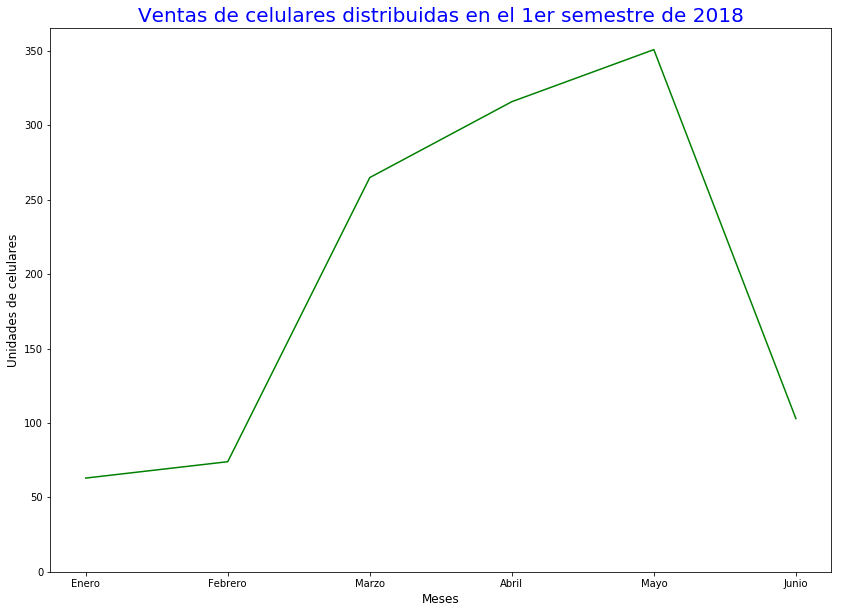

In [18]:
plot = telefonosComprados['timestamp'].dt.month.value_counts().sort_index().plot(kind='line',figsize=(14,10),color = 'green')
plot.set_xlabel('Meses',fontsize=12)
plot.set_ylabel('Unidades de celulares',fontsize=12)
plot.set_title('Ventas de celulares distribuidas en el 1er semestre de 2018', fontsize=20,color = 'blue')
plot.set_xticklabels(['','Enero','Febrero','Marzo','Abril','Mayo','Junio'])
plot.set_ylim(ymin=0)
plt.show()

Se ve que hay un crecimiento de ventas muy alto durante el mes de Marzo,Abril y Mayo (generando un pico de ventas en ese mes), que contrasta mucho con los meses anteriores, aunque para el próximo mes de Junio, demuestra una baja en cantidad de unidades vendidas.
El crecimiento de Mayo se debe a posiblemente algún tipo de Hot-Sale durante el mes de Mayo, lo que aumentó conciderablemente las ventas de ese mes.

### Por dias durante los primeros 6 meses del año

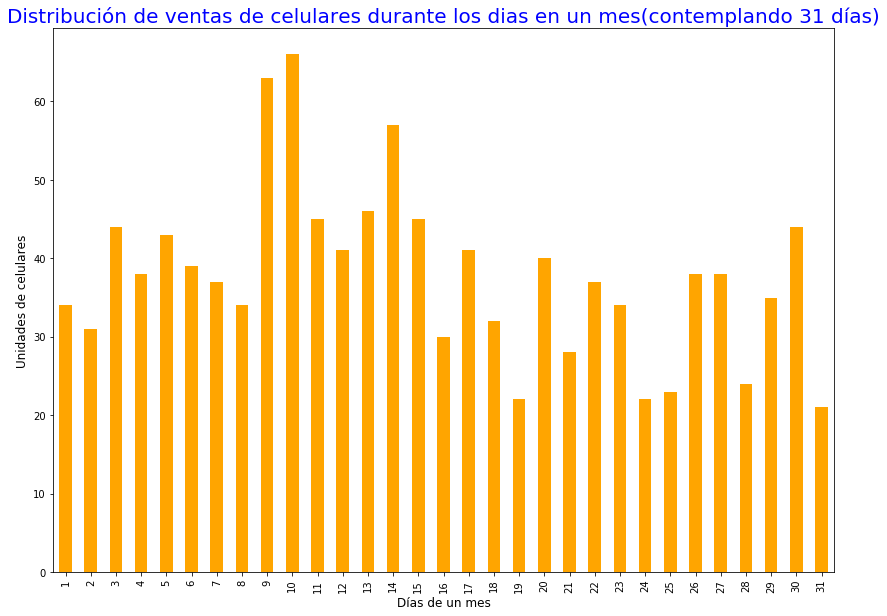

In [19]:
plot = telefonosComprados['timestamp'].dt.day.value_counts().sort_index().plot(kind='bar',figsize=(14,10),color = 'orange')
plot.set_xlabel('Días de un mes',fontsize=12)
plot.set_ylabel('Unidades de celulares',fontsize=12)
plot.set_title('Distribución de ventas de celulares durante los dias en un mes(contemplando 31 días)', fontsize=20,color = 'blue')
plt.show()

Se ve que durante los días 9 y 10 de los meses hay una suba considerable en ventas de teléfonos. Este gráfico muestra que los celulares tienen una baja venta en los días 31 pero esto se debe a que en los primeros 6 meses del año hay solamente 2 meses con 31 días.

### Por días distribuidos durante la semana

In [20]:
telefonosComprados ['dayOfWeek'] = telefonosComprados['timestamp'].dt.day_name()
telefonosComprados['dayOfWeek'] = pd.Categorical(telefonosComprados['dayOfWeek'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

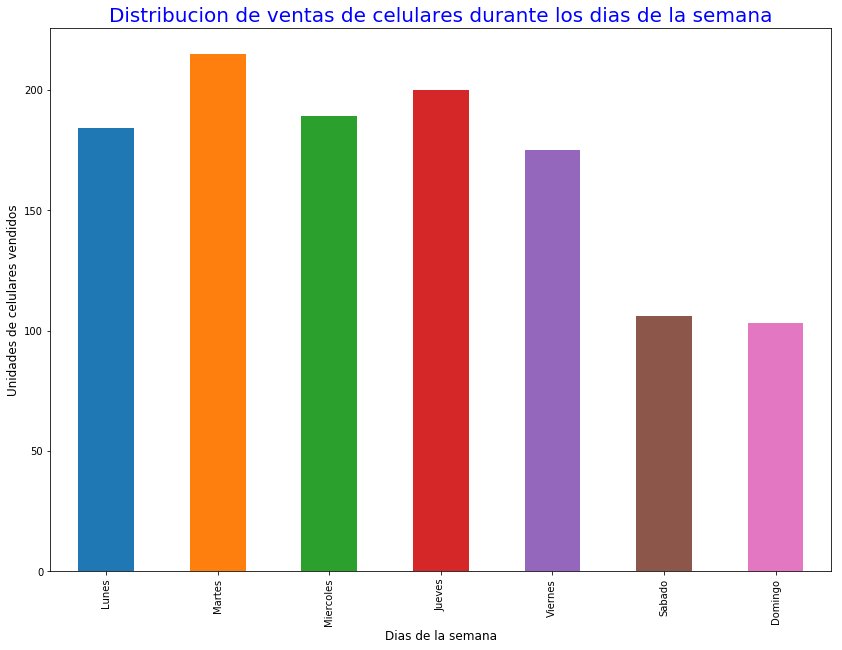

In [21]:
plot = telefonosComprados['dayOfWeek'].value_counts().sort_index().plot(kind='bar',figsize=(14,10))
plot.set_xlabel('Dias de la semana',fontsize=12)
plot.set_ylabel('Unidades de celulares vendidos',fontsize=12)
plot.set_xticklabels(['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])
plot.set_title('Distribucion de ventas de celulares durante los dias de la semana', fontsize=20,color = 'blue')
plt.show()

El site trocafone tiene mucha actividad de ventas de celulares durante los días hábiles de la semana a diferencia de los días de fin de semana, siendo el Domingo el día de menor cantidad de ventas.

## Pequeño análisis sobre los dos usuarios con más compras

In [22]:
usuarioConMasCompras = telefonosComprados.loc[telefonosComprados['person'] == '252adec6' ,:]
segundoUsuarioConMasCompras = telefonosComprados.loc[telefonosComprados['person'] == '4200bdee' ,:]

In [23]:
usuarioConMasCompras['model'].value_counts()

Motorola Moto G3 4G         8
Samsung Galaxy A5           3
Motorola Moto G4 Plus       2
Motorola Moto G4 Play       1
Motorola Moto G2 3G Dual    1
Name: model, dtype: int64

El usuario con más compras solicita en su mayoría modelos de la marca Motorola con una predilección por el modelo Moto G3 4G.

In [24]:
segundoUsuarioConMasCompras['model'].value_counts()

Samsung Galaxy S6 Flat    8
Samsung Galaxy A5         3
Samsung Galaxy A7 2017    1
Name: model, dtype: int64

El segundo usuario con más compras en el site, compra muchos modelos de Samsung pero su prioridad es el Galaxy S6 Flat , marcando una diferencia con el usuario con más ventas.

### Análisis sobre las 3 marcas/modelos con más compras

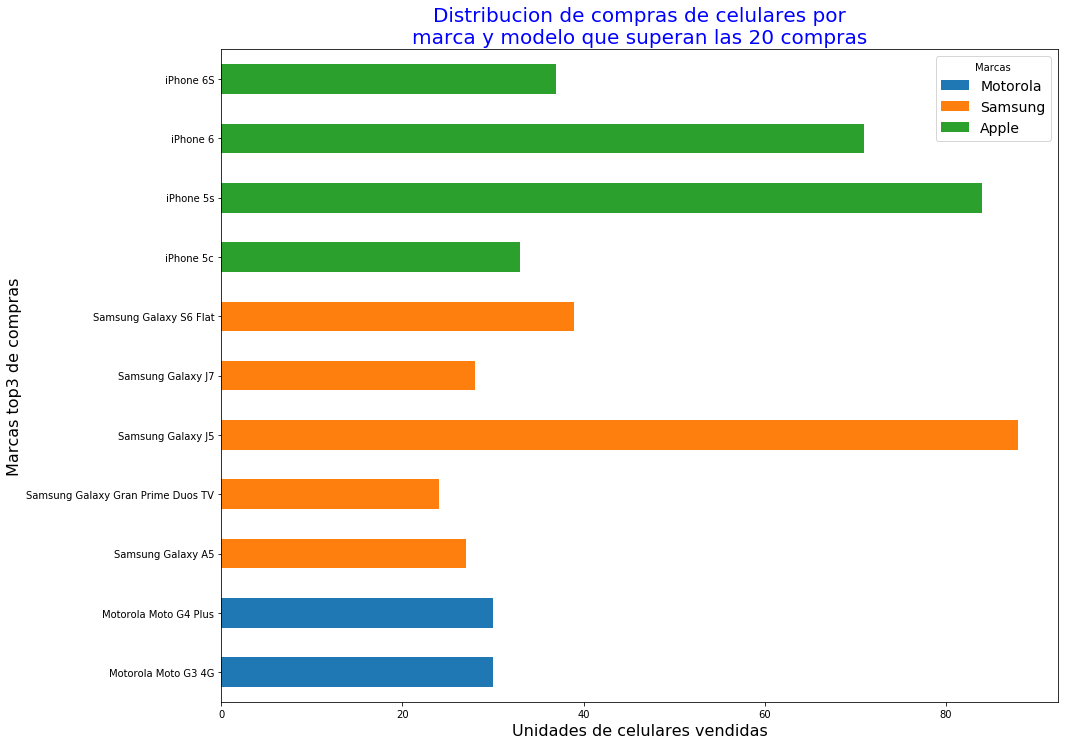

In [25]:
agrupacionPorModeloYMarca = telefonosComprados.groupby(['marca','model']).agg({'person': 'size'})

plot = agrupacionPorModeloYMarca[agrupacionPorModeloYMarca['person'] > 20].unstack(0).plot(kind = 'barh',figsize=(15,12),stacked=True)
plot.set_title('Distribucion de compras de celulares por\nmarca y modelo que superan las 20 compras', fontsize=20,color = 'blue')
plot.set_xlabel('Unidades de celulares vendidas',fontsize=16)
plot.set_ylabel('Marcas top3 de compras',fontsize=16)
plot.legend(['Motorola','Samsung','Apple'],fontsize=14,title='Marcas')
plt.show()

Se ve que los unicas marcas que han superado en algún modelo las 20 compras son Motorola(con dos modelos de celulares), Apple (con cuatro modelos) y Samsung (con cinco modelos).

A su vez podemos notar la diferencia que existe los modelos más pedidos con respecto a los demás (Galaxy J5, iPhone 5s y iPhone6).

### Observemos el comportamiento del usuario más comprador vs el usuario más activo

Sacamos el usuario mas activo del sitio en otro análisis (análisis sobre los usuarios más participativos).

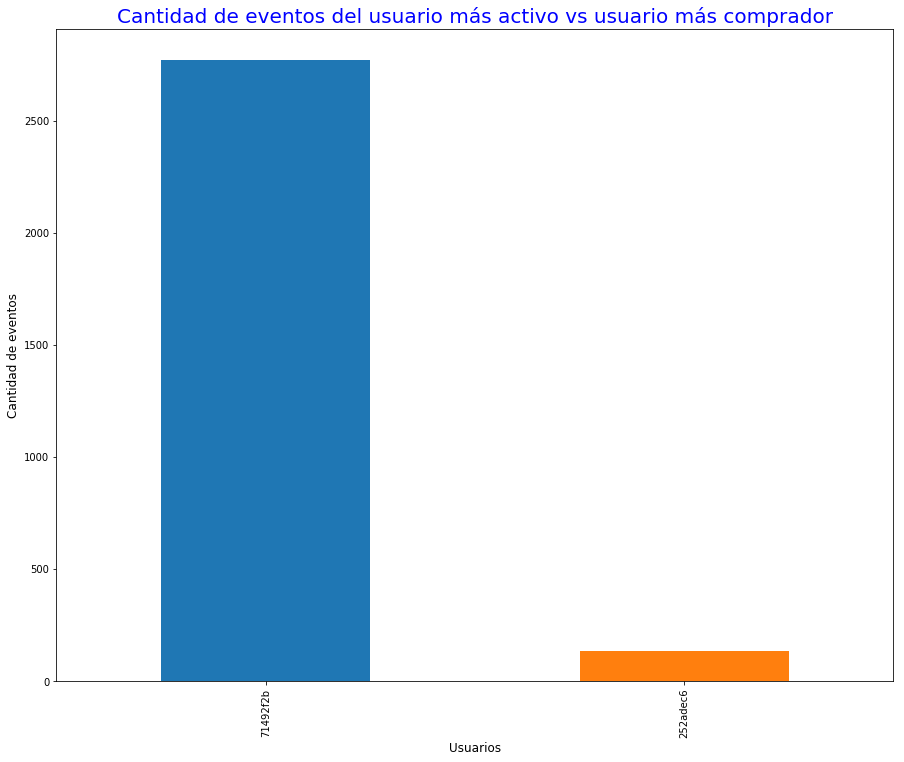

In [26]:
usuarioMasActivo = '71492f2b'
usuarioMasComprador = '252adec6'
usuarioFiltrados = eventos.loc[((eventos['person'] == usuarioMasActivo) | (eventos['person'] == usuarioMasComprador)),:]
plot = usuarioFiltrados['person'].value_counts().plot(kind= 'bar',figsize=(15,12),stacked=False)
plot.set_title('Cantidad de eventos del usuario más activo vs usuario más comprador', fontsize=20,color = 'blue')
plot.set_xlabel('Usuarios',fontsize=12)
plot.set_ylabel('Cantidad de eventos',fontsize=12)
plt.show()

Claramente hay grandes diferencia entre las interacciones de los dos usuarios, superando ampliamente el usuario más activo al usuario más comprador.

### Distribución de los eventos de los dos usuarios analizados.

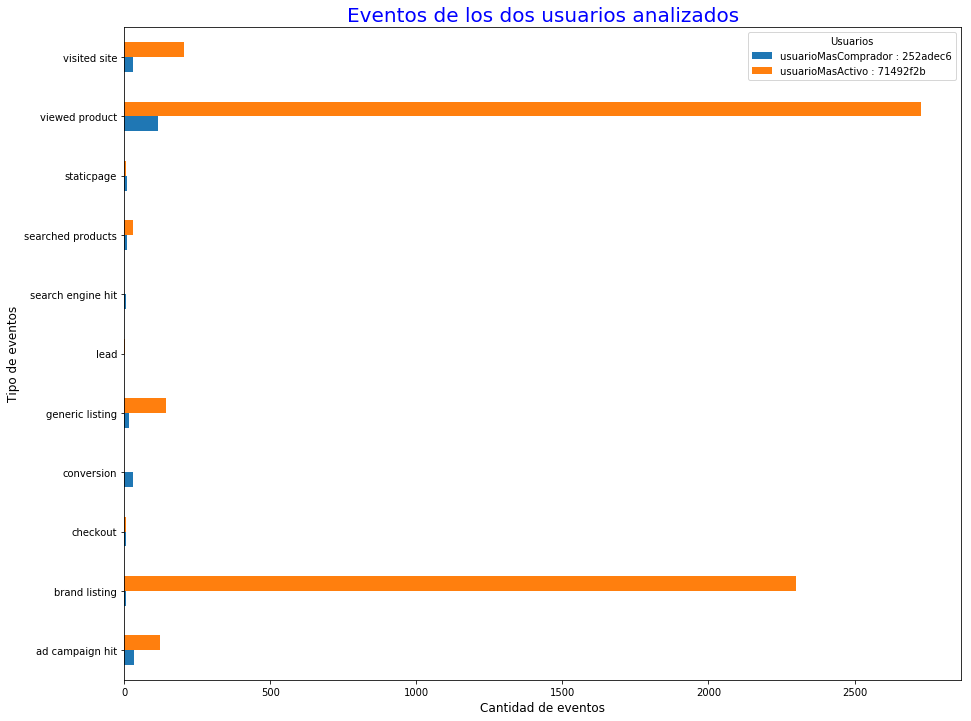

In [27]:
usuariosFiltrados = usuarioFiltrados.loc[:,['person','event']]
plot = usuariosFiltrados.groupby(['person','event']).agg(np.size).unstack(0).plot(kind='barh',figsize=(15,12),stacked=False)
plot.set_title('Eventos de los dos usuarios analizados', fontsize=20,color = 'blue')
plot.set_ylabel('Tipo de eventos',fontsize=12)
plot.set_xlabel('Cantidad de eventos',fontsize=12)
plot.legend(fontsize=15,title='Usuarios')
plot.legend(['usuarioMasComprador : 252adec6','usuarioMasActivo : 71492f2b'],title = 'Usuarios')
plt.show()

Se puede ver que el usuario más comprador ve una cierta cantidad de productos y compra en gran porcentaje, en cambio el usuario más activo, solamente ve productos o mira algún listado específico de algunas marcas sin realizar ningun tipo de conversión por lo que sólo hace consultas sobre el mismo.

#### Y en qué meses se distribuyen sus actividades?

In [28]:
usuariosFiltradosConHorarios = eventos.loc[((eventos['person'] == usuarioMasActivo) | (eventos['person'] == usuarioMasComprador))]
usuariosFiltradosConMeses = usuariosFiltradosConHorarios.loc[:,['person','timestamp']]
usuariosFiltradosConMeses['month'] = usuariosFiltradosConMeses['timestamp'].dt.month_name()
usuariosFiltradosConMeses = usuariosFiltradosConMeses.drop('timestamp', 1)

In [29]:
plot = usuariosFiltradosConMeses.groupby(['person','month']).agg(np.size).reset_index()

plot['month'] = pd.Categorical(plot['month'], categories=['January','February','March','April','May','June'], ordered=True)
plot = plot.sort_values('month')

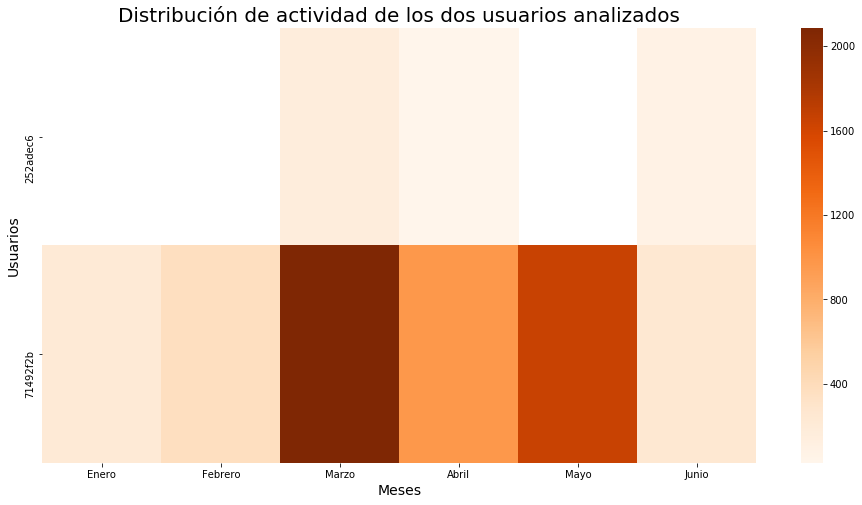

In [30]:
pivoted = pd.pivot_table(plot,values=0,columns='month', \
               index='person')
fig, ax = plt.subplots(figsize=(16,8))         # Sample figsize in inches
g = sns.heatmap(pivoted,cmap='Oranges');
g.set_title('Distribución de actividad de los dos usuarios analizados', fontsize=20)
g.set_xticklabels(['Enero','Febrero','Marzo','Abril','Mayo','Junio'])
g.set_xlabel('Meses', fontsize=14)
g.set_ylabel('Usuarios', fontsize=14)

plt.show()

Por consiguiente, el HeatMaps muestra como el usuario más comprador tiene actividad en solo 3 meses(y muy poca comparada con el otro usuario), mientras que el usuario más activo registra una actividad constante durante los 6 meses,con un gran caudal de eventos en los meses de Marzo, Abril y Mayo.

#### Y cómo se distribuyen sus actividades en la semana?

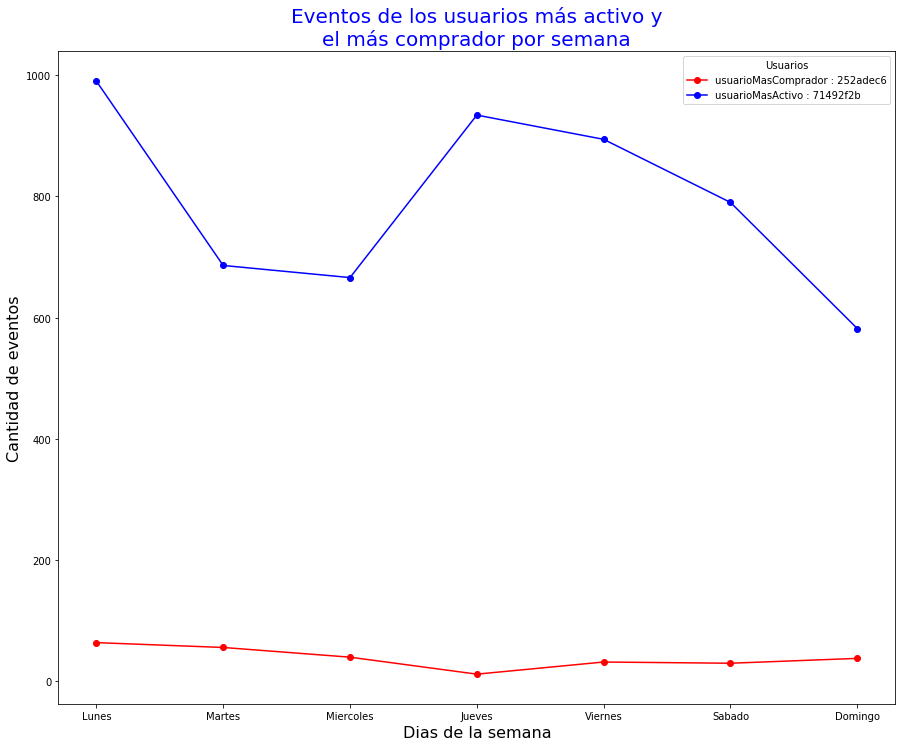

In [31]:
usuariosFiltradosCondias = usuariosFiltradosConHorarios.loc[:,['person','timestamp']]
usuariosFiltradosCondias['dayOfWeek'] = usuariosFiltradosCondias['timestamp'].dt.day_name()
usuariosFiltradosCondias = usuariosFiltradosCondias.drop('timestamp', 1)
usuariosFiltradosCondias['dayOfWeek'] = pd.Categorical(usuariosFiltradosCondias['dayOfWeek'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
usuariosFiltradosCondias = usuariosFiltradosCondias.sort_values('dayOfWeek')
plot = usuariosFiltradosCondias.groupby(['person','dayOfWeek']).agg(np.size).unstack(0).plot(kind = 'line',style=['ro-','bo-'],figsize=(15,12))
plot.set_ylabel('Cantidad de eventos',fontsize=16)
plot.set_xlabel('Dias de la semana',fontsize=16)
plot.set_title('Eventos de los usuarios más activo y\nel más comprador por semana', fontsize=20,color = 'blue')
plot.legend(fontsize=15,title='Usuarios')
plot.legend(['usuarioMasComprador : 252adec6','usuarioMasActivo : 71492f2b'],title = 'Usuarios')
plot.set_xticklabels(['','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado', 'Domingo'])
plt.show()

De la visualización se pueden dilucidar que el usuario más comprador del site es constante y con un seguimiento/interacción de bajo nivel.Esto contrasta mucho con el usuario con más interacción en el sitio, que mantiene una gran cantidad de eventos durante toda la semana con picos de interacción en algunos días en particular.
